In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
historical_df=pd.read_csv('historical_data.csv')
historical_df.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12


In [3]:
fear_greed_df=pd.read_csv('fear_greed_index.csv')
fear_greed_df.head()

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [4]:
historical_df.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

In [5]:
fear_greed_df.columns

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')

In [6]:
historical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55784 entries, 0 to 55783
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Account           55784 non-null  object 
 1   Coin              55784 non-null  object 
 2   Execution Price   55784 non-null  float64
 3   Size Tokens       55784 non-null  float64
 4   Size USD          55784 non-null  float64
 5   Side              55784 non-null  object 
 6   Timestamp IST     55784 non-null  object 
 7   Start Position    55784 non-null  float64
 8   Direction         55784 non-null  object 
 9   Closed PnL        55784 non-null  float64
 10  Transaction Hash  55784 non-null  object 
 11  Order ID          55783 non-null  float64
 12  Crossed           55783 non-null  object 
 13  Fee               55783 non-null  float64
 14  Trade ID          55783 non-null  float64
 15  Timestamp         55783 non-null  float64
dtypes: float64(9), object(7)
memory usage: 6

In [7]:
historical_df.shape

(55784, 16)

In [8]:
fear_greed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [9]:
fear_greed_df.shape

(2644, 4)

In [10]:
print("missing values in historical data")
print(historical_df.isnull().sum())

missing values in historical data
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            1
Crossed             1
Fee                 1
Trade ID            1
Timestamp           1
dtype: int64


In [11]:
print("duplicated values in historical data ")
print(historical_df.duplicated().sum())

duplicated values in historical data 
0


In [12]:
print("missing values in fear greed data")
print(fear_greed_df.isnull().sum())

missing values in fear greed data
timestamp         0
value             0
classification    0
date              0
dtype: int64


In [13]:
print("duplicated values in fear greed data")
print(fear_greed_df.duplicated().sum())


duplicated values in fear greed data
0


EDA

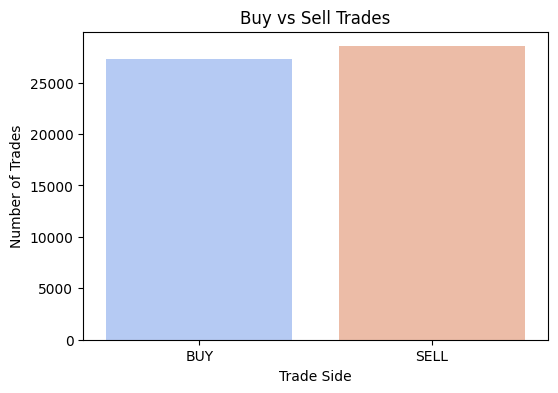

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(data=historical_df, x='Side', palette='coolwarm')
plt.title('Buy vs Sell Trades')
plt.xlabel('Trade Side')
plt.ylabel('Number of Trades')
plt.show()

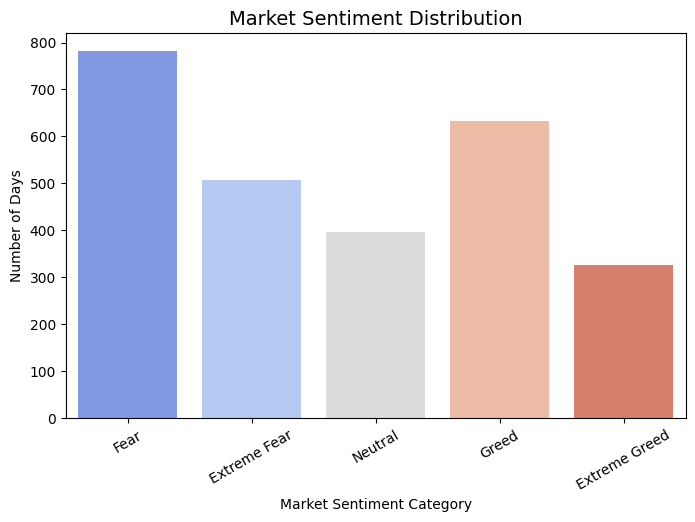

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))

sns.countplot(data=fear_greed_df, x='classification', palette='coolwarm')

plt.title('Market Sentiment Distribution', fontsize=14)
plt.xlabel('Market Sentiment Category')
plt.ylabel('Number of Days')
plt.xticks(rotation=30)
plt.show()


In [16]:
# Data prep for Analysis
historical_df['Timestamp IST'] = pd.to_datetime(historical_df['Timestamp IST'], errors='coerce', dayfirst=True)
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'], errors='coerce')

In [17]:
historical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55784 entries, 0 to 55783
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Account           55784 non-null  object        
 1   Coin              55784 non-null  object        
 2   Execution Price   55784 non-null  float64       
 3   Size Tokens       55784 non-null  float64       
 4   Size USD          55784 non-null  float64       
 5   Side              55784 non-null  object        
 6   Timestamp IST     55784 non-null  datetime64[ns]
 7   Start Position    55784 non-null  float64       
 8   Direction         55784 non-null  object        
 9   Closed PnL        55784 non-null  float64       
 10  Transaction Hash  55784 non-null  object        
 11  Order ID          55783 non-null  float64       
 12  Crossed           55783 non-null  object        
 13  Fee               55783 non-null  float64       
 14  Trade ID          5578

In [18]:
fear_greed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   timestamp       2644 non-null   int64         
 1   value           2644 non-null   int64         
 2   classification  2644 non-null   object        
 3   date            2644 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 82.8+ KB


In [21]:
df_merged = pd.merge(fear_greed_df, historical_df, left_on='date', right_on='Timestamp IST', how='inner')
display(df_merged.head())
display(df_merged.info())

,timestamp,value,classification,date,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,1704951000,76,Extreme Greed,2024-01-11,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,46535.0,0.03170,1475.16,BUY,2024-01-11,0.00000,Open Long,0.000000,0x0004ae8e41eaab295eec040716d18501f400ce966f83...,6.729928e+09,True,0.368789,8.930000e+14,1.700000e+12
1,1704951000,76,Extreme Greed,2024-01-11,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,46543.0,0.50556,23530.28,BUY,2024-01-11,0.03170,Open Long,0.000000,0x0004ae8e41eaab295eec040716d18501f400ce966f83...,6.729928e+09,True,5.882569,8.010000e+14,1.700000e+12
2,1704951000,76,Extreme Greed,2024-01-11,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2433.6,0.75000,1825.20,SELL,2024-01-11,0.00000,Open Short,0.000000,0xbc675ce27939e47d3632040716d1ab02017c0098c310...,6.729949e+09,True,0.456300,8.770000e+14,1.700000e+12
3,1704951000,76,Extreme Greed,2024-01-11,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2433.4,9.52030,23166.70,SELL,2024-01-11,-0.75000,Open Short,0.000000,0xbc675ce27939e47d3632040716d1ab02017c0098c310...,6.729949e+09,True,5.791674,5.310000e+14,1.700000e+12
4,1705901400,55,Greed,2024-01-22,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,41697.0,0.00149,62.13,BUY,2024-01-22,-1.20143,Close Short,-0.123521,0xdaf01d746ac3146b4be9040741d6040131007c30ef85...,7.679882e+09,True,0.015532,1.110000e+15,1.710000e+12


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   timestamp         63 non-null     int64         
 1   value             63 non-null     int64         
 2   classification    63 non-null     object        
 3   date              63 non-null     datetime64[ns]
 4   Account           63 non-null     object        
 5   Coin              63 non-null     object        
 6   Execution Price   63 non-null     float64       
 7   Size Tokens       63 non-null     float64       
 8   Size USD          63 non-null     float64       
 9   Side              63 non-null     object        
 10  Timestamp IST     63 non-null     datetime64[ns]
 11  Start Position    63 non-null     float64       
 12  Direction         63 non-null     object        
 13  Closed PnL        63 non-null     float64       
 14  Transaction Hash  63 non-nul

None

In [23]:
sentiment_analysis = df_merged.groupby('classification').agg(
    mean_closedPnL=('Closed PnL', 'mean'),
    median_closedPnL=('Closed PnL', 'median'),
    std_closedPnL=('Closed PnL', 'std'),
    mean_size=('Size Tokens', 'mean'),
    median_size=('Size Tokens', 'median'),
    std_size=('Size Tokens', 'std')
)
display(sentiment_analysis)

,mean_closedPnL,median_closedPnL,std_closedPnL,mean_size,median_size,std_size
classification,,,,,,
Extreme Greed,20.403769,4.54914,25.662426,2.050745e+04,4.576760e+03,2.579037e+04
Fear,0.000000,0.00000,0.000000,6.907484e+01,3.681000e+01,6.875154e+01
Greed,10.469609,0.00000,101.615058,5.106621e+02,1.309300e+00,1.303563e+03
Neutral,0.000000,0.00000,0.000000,3.083466e+06,3.083466e+06,4.360679e+06


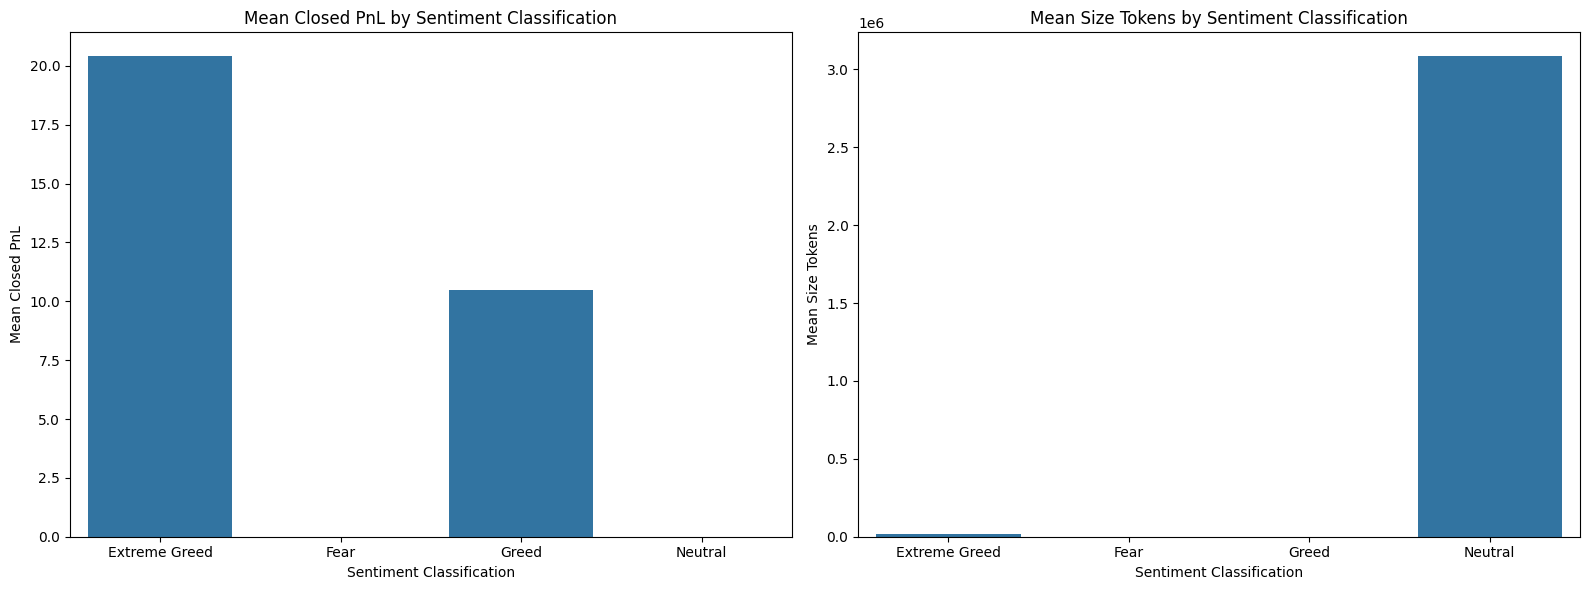

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot mean Closed PnL
sns.barplot(x=sentiment_analysis.index, y='mean_closedPnL', data=sentiment_analysis, ax=axes[0])
axes[0].set_title('Mean Closed PnL by Sentiment Classification')
axes[0].set_xlabel('Sentiment Classification')
axes[0].set_ylabel('Mean Closed PnL')

# Plot mean Size Tokens
sns.barplot(x=sentiment_analysis.index, y='mean_size', data=sentiment_analysis, ax=axes[1])
axes[1].set_title('Mean Size Tokens by Sentiment Classification')
axes[1].set_xlabel('Sentiment Classification')
axes[1].set_ylabel('Mean Size Tokens')

plt.tight_layout()
plt.show()

In [27]:
# Create the new columns in df_merged
df_merged['total_pnl'] = df_merged['Closed PnL']
df_merged['total_volume'] = df_merged['Size USD']
df_merged['sentiment_norm'] = df_merged['value']

# Display the updated DataFrame with new columns
display(df_merged.head())

,timestamp,value,classification,date,Account,Coin,Execution Price,Size Tokens,Size USD,Side,...,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,total_pnl,total_volume,sentiment_norm
0,1704951000,76,Extreme Greed,2024-01-11,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,46535.0,0.03170,1475.16,BUY,...,0.000000,0x0004ae8e41eaab295eec040716d18501f400ce966f83...,6.729928e+09,True,0.368789,8.930000e+14,1.700000e+12,0.000000,1475.16,76
1,1704951000,76,Extreme Greed,2024-01-11,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,46543.0,0.50556,23530.28,BUY,...,0.000000,0x0004ae8e41eaab295eec040716d18501f400ce966f83...,6.729928e+09,True,5.882569,8.010000e+14,1.700000e+12,0.000000,23530.28,76
2,1704951000,76,Extreme Greed,2024-01-11,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2433.6,0.75000,1825.20,SELL,...,0.000000,0xbc675ce27939e47d3632040716d1ab02017c0098c310...,6.729949e+09,True,0.456300,8.770000e+14,1.700000e+12,0.000000,1825.20,76
3,1704951000,76,Extreme Greed,2024-01-11,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,ETH,2433.4,9.52030,23166.70,SELL,...,0.000000,0xbc675ce27939e47d3632040716d1ab02017c0098c310...,6.729949e+09,True,5.791674,5.310000e+14,1.700000e+12,0.000000,23166.70,76
4,1705901400,55,Greed,2024-01-22,0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23,BTC,41697.0,0.00149,62.13,BUY,...,-0.123521,0xdaf01d746ac3146b4be9040741d6040131007c30ef85...,7.679882e+09,True,0.015532,1.110000e+15,1.710000e+12,-0.123521,62.13,55


In [28]:
#Correlation Analysis
corr = df_merged[['total_pnl','total_volume','sentiment_norm']].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation: Trader Behavior vs Market Sentiment")
plt.show()
plt.savefig('/content/ds_SaurabhPandey/outputs/correlation_heatmap.png')

KeyError: "['price_risk'] not in index"

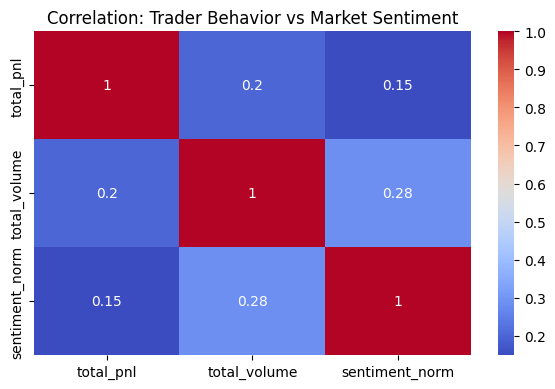

In [31]:

corr = df_merged[['total_pnl', 'total_volume', 'sentiment_norm']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation: Trader Behavior vs Market Sentiment")
plt.tight_layout()
plt.show()


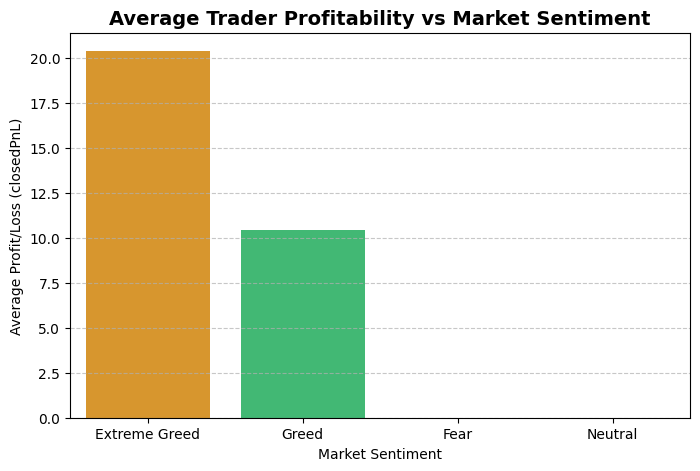

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

profit_summary = df_merged.groupby('classification')['Closed PnL'].mean().reset_index()
profit_summary = profit_summary.sort_values(by='Closed PnL', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(data=profit_summary, x='classification', y='Closed PnL', palette={'Greed':'#2ecc71','Fear':'#e74c3c', 'Extreme Greed':'#f39c12', 'Neutral':'#bdc3c7'})

plt.title('Average Trader Profitability vs Market Sentiment', fontsize=14, fontweight='bold')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Profit/Loss (closedPnL)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [33]:
df_merged.columns

Index(['timestamp', 'value', 'classification', 'date', 'Account', 'Coin',
       'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST',
       'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash',
       'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'total_pnl',
       'total_volume', 'sentiment_norm'],
      dtype='object')